#1. LinkPred санг суулгах (to top)
Эхний алхам бол, linkpred санг суулгах бөгөөд амжилттай суусан тохиолдолд уг сангын функцүүдтэй
ажиллах боломжтой болно.
Санг суулгахдаа pip ашиглаж болно.

In [19]:
!pip install linkpred

In [20]:
import linkpred

#2. Таамаглах үйл явцын дараалал
linkpred нь дараах 3-н үе шаттайгаар Холбоосыг таамаглах үйл явцыг биелүүлдэг.
1. Сүлжээгээ байгуулах - Network Loading
2. Таамаглагчаа сонгох, аппликейшн - Predictor selection and application
3. Үр дүн үнэлэх - Results evaluation
#2.A Файлаас уншиж сүлжээг байгуулах
Эхлээд, linkpred нь файлаас графыг уншихыг шаарддаг. Бид энэ удаа Game of Thrones Season 6
(Хаадын тоглоом цуврал)-ийн ирмэгүүдийг мэдээллийг ашиглана.

In [21]:
%matplotlib inline

In [22]:
import matplotlib.pyplot as plt  # График үүсгэхэд ашигладаг matplotlib-ийн pyplot модулийг импортлоно
import networkx as nx  # Сүлжээний графиктай ажиллах networkx санг импортлоно

def read_net_w(filename):  # 'read_net_w' нэртэй функц тодорхойлж, файлын нэрийг параметрээр авна
    g = nx.Graph()  # Хоосон график объектийг (g) үүсгэнэ, энэ нь харилцаануудыг хадгална
    with open(filename) as f:  # Файлыг уншихын тулд нээнэ, 'f' нь файлын объект болно
        f.readline()  # Файлын эхний мөрийг уншиж алгасна учир нь толгой хэсэг байдаг.
        for l in f:  # Файлын үлдсэн мөрүүдийг давталтанд оруулан мөр бүрээр уншина
            l = l.split(",")  # Мөрийг таслалаар тусгаарлаж, жагсаалт болгон хуваана
            g.add_edge(l[0], l[1], weight=int(l[2]))  # Графикт хослол нэмнэ: эхний хоёр элемент нь зангилаанууд, гурав дахь нь жин (тоо(int) болгон хөрвүүлнэ)
    return g  # график объектыг буцаана

# Game of Thrones-ийн өгөгдөл
g = read_net_w('/content/got-s6-edges.csv')  # 'got-s6-edges.csv' файлаас график үүсгэх функцийг дуудна

#2.B Удирдлагагүй сургалтын таамаглагч тооцоолох
linkpred нь 4 бүлэг удирдлагагүй сургалтын таамаглагчид өргөн хэрэглэгдэж байна. Үүнд:
Neighborhood:
 AdamicAdar, AssociationStrength, CommonNeighbours, Cosine, DegreeProduct,
Jaccard, MaxOverlap, MinOverlap, NMeasure, Pearson,ResourceAllocation
Paths:
GraphDistance, Katz
Ranking:
SimRank, RootedPageRank
Miscellanea:
Community, Copy, Random
Энэ лаборатороор бид цөөн хэдэн аргыг орууллаа.
Энгийн ойлгомжтой байлгахын тулд бид сонгогдсон таамаглагч бүрт топ-5 нь үр дүнг харууллаа.
#2.B.1 Neighborhood
Эхний хэсэг бүлэг таамаглагч бол зангилаа бүрийн хувьд холбогдох боломжтой хос оройг уг хоёр оройн
хөрш оройнуудтайгаа хэр хүчтэй сул холбогдсон байдлаас үүдэн холбоосыг
үүсэх эсэх магадлалаар олдог.
Энэ төрлийн таамаглагчид нь дараах асуултанд хариулт олохыг хичээдэг. How many friend we have to
share in order to become friends?
#Common Neighbors
Илүү олон дундын найзуудтай бол бид найз болох магадлал өндөр байна.

In [23]:
cn = linkpred.predictors.CommonNeighbours(g, excluded=g.edges())  # CommonNeighbours урьдчилан таамаглагчийг эхлүүлнэ; 'g' графикаас одоо байгаа холбоосуудыг хасан шинэ холбоос таамаглана
cn_results = cn.predict()  # График дээрх боломжит шинэ холбоосуудыг таамаглаж, үр дүнг хадгална

top = cn_results.top(5)  # Таамаглалын үр дүнгээс хамгийн өндөр оноотой 5 холбоосыг сонгоно
for edge, score in top.items():  # Сонгогдсон холбоос бүр дээр давталт ажиллуулж, зангилааны хос ба оноог хэвлэнэ
    print(edge, score)  # Зангилааны хос (edge) болон түүний оноог (score) хэвлэнэ

TOMMEN - MACE 8.0
NED - LADY_CRANE 8.0
NED - CLARENZO 8.0
MARGAERY - IZEMBARO 8.0
MARGAERY - ARYA 8.0


#Jaccard
Топологи бүтэц болон аттрибутуудын ижил төсөөтэй байдал нь найз болох эсэхийг тодорхойлно.


In [24]:
jc = linkpred.predictors.Jaccard(g, excluded=g.edges())  # Jaccard урьдчилан таамаглагчийг эхлүүлнэ; 'g' графикаас одоо байгаа холбоосуудыг хасан шинэ холбоос таамаглана
jc_results = jc.predict()  # График дээрх боломжит шинэ холбоосуудыг Jaccard-ийн аргаар таамаглаж, үр дүнг хадгална

top = jc_results.top(5)  # Таамаглалын үр дүнгээс хамгийн өндөр оноотой 5 холбоосыг сонгоно
for edge, score in top.items():  # Сонгогдсон холбоос бүр дээр давталт ажиллуулж, зангилааны хос ба оноог хэвлэнэ
    print(edge, score)  # Зангилааны хос (edge) болон түүний Jaccard оноог (score) хэвлэнэ

RED_PRIEST - KINVARA 1.0
LITTLE_SAM - DICKON 1.0
TOMMEN - MACE 0.7272727272727273
JOFFREY - CAMELLO 0.7272727272727273
OLD_NAN - BENJEN 0.7142857142857143


#Adamic Adar
Бидний дундын найзын тоо нь биднийг найз болох эсэхийг тодорхойлоход ашиглагдана.

In [25]:
aa = linkpred.predictors.AdamicAdar(g, excluded=g.edges())  # AdamicAdar урьдчилан таамаглагчийг эхлүүлнэ; 'g' графикаас одоо байгаа холбоосуудыг хасан шинэ холбоос таамаглана
aa_results = aa.predict()  # График дээрх боломжит шинэ холбоосуудыг Adamic-Adar аргаар таамаглаж, үр дүнг хадгална

top = aa_results.top(5)  # Таамаглалын үр дүнгээс хамгийн өндөр оноотой 5 холбоосыг сонгоно
for edge, score in top.items():  # Сонгогдсон холбоос бүр дээр давталт ажиллуулж, зангилааны хос ба оноог хэвлэнэ
    print(edge, score)  # Зангилааны хос (edge) болон түүний Adamic-Adar оноог (score) хэвлэнэ

TOMMEN - MACE 3.1875572810307893
NED - LADY_CRANE 3.1263711657257836
NED - CLARENZO 3.1263711657257836
SANSA - ROBB 3.0966443151332466
JOFFREY - CAMELLO 2.8944937119329137


#2.B.2 Paths
Хоёрдогч төрлийн таамаглагчид нь хос оройн хоорондын зайнаас хамаарч тэд ирээдүйд холбогдох
эсэхийг магадлаар боддог.
Энэ төрлийн таамаглагчид нь дараах асуултад хариулт олохыг хичээдэг: How distant are we?
#Katz
Katz computes the weighted sum over all the paths between two nodes.

In [26]:
kz = linkpred.predictors.Katz(g, excluded=g.edges())  # Katz урьдчилан таамаглагчийг эхлүүлнэ; 'g' графикаас одоо байгаа холбоосуудыг хасан шинэ холбоос таамаглана
kz_results = kz.predict()  # График дээрх боломжит шинэ холбоосуудыг Katz-ийн аргаар таамаглаж, үр дүнг хадгална

top = kz_results.top(5)  # Таамаглалын үр дүнгээс хамгийн өндөр оноотой 5 холбоосыг сонгоно
for edge, score in top.items():  # Сонгогдсон холбоос бүр дээр давталт ажиллуулж, зангилааны хос ба оноог хэвлэнэ
    print(edge, score)  # Зангилааны хос (edge) болон түүний Katz оноог (score) хэвлэнэ


LADY_CRANE - JAQEN 0.005571576860773001
SANSA - ALLISER_THORNE 0.004234378077202
TYRION - DAARIO 0.004145905054793999
CERSEI - BRIENNE 0.0038862606857720003
MELISANDRE - LYANNA_MORMONT 0.0035937193855959996


#Graph Distance
Графын зай буюу Distance нь хоёр оройн хоорондын богино замын уртаар тодорхойлогдоно.


In [27]:
gd = linkpred.predictors.GraphDistance(g, excluded=g.edges())  # GraphDistance урьдчилан таамаглагчийг эхлүүлнэ; 'g' графикаас одоо байгаа холбоосуудыг хасан шинэ холбоос таамаглана
gd_results = gd.predict()  # График дээрх боломжит шинэ холбоосуудыг GraphDistance аргаар таамаглаж, үр дүнг хадгална

top = gd_results.top(5)  # Таамаглалын үр дүнгээс хамгийн өндөр оноотой 5 холбоосыг сонгоно (гэдэг ч GraphDistance-д "бага" зай илүү утгатай байж болно)
for edge, score in top.items():  # Сонгогдсон холбоос бүр дээр давталт ажиллуулж, зангилааны хос ба оноог хэвлэнэ
    print(edge, score)  # Зангилааны хос (edge) болон түүний GraphDistance оноог (score) хэвлэнэ

LADY_CRANE - JAQEN 36.136054421768705
TYRION - DAARIO 30.29268292682927
CERSEI - BRIENNE 28.44827586206896
MELISANDRE - LITTLEFINGER 23.427491305005294
CERSEI - BRONN 23.294117647058822


#2.B.3 Rankig
Гуравдагч бүлэг таамаглагчид нь граф дахь хос оройнуудын байрлалаас хамаарч холбогдох магадлалыг
тооцоолно.
Дараах асуултанд хариулж буй байдлаас хамаарч тодорхойлогдоно: *How similar are we?
#SimRank
Хоёр зангилаа холбоосоор холбогдохын тул тэдгээрийн хөрш оройнууд ижил төсөөтэй байх хэрэгтэй.

In [28]:
simrank = linkpred.predictors.SimRank(g, excluded=g.edges())  # SimRank урьдчилан таамаглагчийг эхлүүлнэ; 'g' графикаас одоо байгаа холбоосуудыг хасан шинэ холбоос таамаглана
simrank_results = simrank.predict(c=0.5)  # SimRank аргаар боломжит шинэ холбоосуудыг таамаглаж, үр дүнг хадгална; 'c=0.5' нь буурах коэффициент (decay factor) бөгөөд ижил төстэй байдлыг тооцоход ашиглана

top = simrank_results.top(5)  # Таамаглалын үр дүнгээс хамгийн өндөр оноотой 5 холбоосыг сонгоно
for edge, score in top.items():  # Сонгогдсон холбоос бүр дээр давталт ажиллуулж, зангилааны хос ба оноог хэвлэнэ
    print(edge, score)  # Зангилааны хос (edge) болон түүний SimRank оноог (score) хэвлэнэ

MAESTER_CITADEL - MAESTER_AEMON 0.3920701611834253
RAY - GATINS 0.3886464843365491
GATINS - BERIC 0.3675791855431439
THOROS - GATINS 0.3636591552182033
MAESTER_AEMON - GILLY 0.319889623157789


#2.B.4 Miscellanea
Энэ нь холбоосыг таамаглахдаа санамсаргүй байдлаар сонгож авдаг.
linkpred groups here approaches that are commonly used as baselines.
#Random
Санамсаргүй байдлаар таах.


In [29]:
rnd = linkpred.predictors.Random(g, excluded=g.edges())  # g сүлжээнд суурилсан санамсаргүй холбоос таамаглагчийг үүсгэнэ, одоо байгаа холбоосуудыг (edges) хасна
rnd_results = rnd.predict()  # Санамсаргүй таамаглагчийн үр дүнг тооцоолж, rnd_results хувьсагчид хадгална
top = rnd_results.top(5)  # rnd_results-ээс хамгийн өндөр оноотой 5 холбоосыг сонгоно
for edge, score in top.items():  # top-н элементүүдийг (холбоос ба оноо) давтан хэвлэнэ
    print(edge, score)  # Холбоос (edge) болон түүний оноог (score) хэвлэнэ

IZEMBARO - BLACK_WALDER 0.9999940444679002
PODRICK - BOBONO 0.9999774122300122
BRYNDEN - ALLISER_THORNE 0.9999662579951368
JAIME - EURON 0.9998960941874214
SHIREEN - BOBONO 0.999416590463767


#2.C Ялгаатай таамаглагчидын харьцуулах болон үнэлэх
Холбоосуудыг үүсэх эсэхыг таамаглахдаа бид сургалтын болон тестийн өгөгдлүүдтэй ажиллаж
шалгана. Өгөгдлөө сургалтын болон тестийн болгон хуваах шаардлагатай.

In [30]:
import random  # Санамсаргүй тоо, сонголт хийхэд ашиглагддаг модулийг импортлоно
import itertools  # Хослол, давталттай ажиллахад туслах модулийг импортлоно
from linkpred.evaluation import Pair  # linkpred сангаас Pair классыг импортлоно, энэ нь хосыг (node pair) төлөвллөхөд хэрэглэгдэнэ
test = read_net_w(f'/content/got-s7-edges.csv')  # "got-s7-edges.csv" файлаас сүлжээний өгөгдлийг уншиж, test хувьсагчид хадгална
training = g.copy()  # g сүлжээний хуулбарыг хийж, training хувьсагчид хадгална
nodes = list(g.nodes())  # g сүлжээн дэх бүх зангилааг жагсаалт болгон хадгална
nodes.extend(list(test.nodes()))  # test сүлжээн дэх зангилаануудыг nodes жагсаалтад нэмнэ

test = [Pair(i) for i in test.edges()]  # test сүлжээний холбоосуудыг (edges) Pair объект болгон хөрвүүлж, жагсаалт хэлбэрээр хадгална
universe = set([Pair(i) for i in itertools.product(nodes, nodes) if i[0] != i[1]])  # Бүх боломжит зангилааны хослолуудыг (өөрөөсөө өөртэй холбоосгүй) Pair болгон хөрвүүлж, set хэлбэрээр хадгална

**Дараагаар нь бид сургалтын өгөгдөл дээрээ таамаглагчаа ажиллуулна**

In [31]:
cn = linkpred.predictors.CommonNeighbours(training, excluded=training.edges())  # training сүлжээнд Common Neighbours алгоритмыг ашиглан таамаглагч үүсгэнэ, одоо байгаа холбоосуудыг хасна
cn_results = cn.predict()  # Common Neighbours алгоритмаар таамаглал хийж, үр дүнг cn_results хувьсагчид хадгална

aa = linkpred.predictors.AdamicAdar(training, excluded=training.edges())  # training сүлжээнд Adamic-Adar алгоритмыг ашиглан таамаглагч үүсгэнэ, одоо байгаа холбоосуудыг хасна
aa_results = aa.predict()  # Adamic-Adar алгоритмаар таамаглал хийж, үр дүнг aa_results хувьсагчид хадгална

jc = linkpred.predictors.Jaccard(training, excluded=training.edges())  # training сүлжээнд Jaccard алгоритмыг ашиглан таамаглагч үүсгэнэ, одоо байгаа холбоосуудыг хасна
jc_results = jc.predict()  # Jaccard алгоритмаар таамаглал хийж, үр дүнг jc_results хувьсагчид хадгална

**Тэгээд бид тестийн өгөгдлөө ашиглан таамаглагч хэр үнэн таамаглаж буй үнэлнэ**

In [32]:
cn_evaluation = linkpred.evaluation.EvaluationSheet(cn_results, test, universe)
# cn_results-ийн таамаглалыг test багц болон universe багцтай харьцуулж үнэлгээний хуудас үүсгэнэ

aa_evaluation = linkpred.evaluation.EvaluationSheet(aa_results, test, universe)
# aa_results-ийн таамаглалыг test багц болон universe багцтай харьцуулж үнэлгээний хуудас үүсгэнэ

jc_evaluation = linkpred.evaluation.EvaluationSheet(jc_results, test, universe)
# jc_results-ийн таамаглалыг test багц болон universe багцтай харьцуулж үнэлгээний хуудас үүсгэнэ

**Үр дүнгүүдээ тайлбарлахдаа бид ROC -ийн муруй ашиглан дүрслэнэ.**

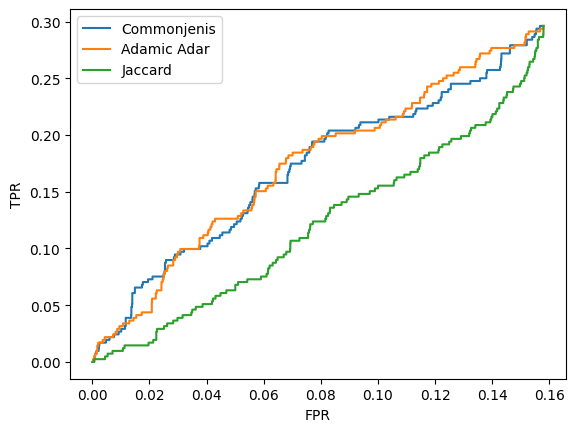

In [33]:
plt.plot(cn_evaluation.fallout(), cn_evaluation.recall(), label="Commonjenis")
 # cn_evaluation-ийн FPR (fallout) болон TPR (recall)-ийг графикт зурж, шошгыг "Common Neighbors" гэж тавина

plt.plot(aa_evaluation.fallout(), aa_evaluation.recall(), label="Adamic Adar")
# aa_evaluation-ийн FPR (fallout) болон TPR (recall)-ийг графикт зурж, шошгыг "Adamic Adar" гэж тавина

plt.plot(jc_evaluation.fallout(), jc_evaluation.recall(), label="Jaccard")
# jc_evaluation-ийн FPR (fallout) болон TPR (recall)-ийг графикт зурж, шошгыг "Jaccard" гэж тавина

plt.ylabel("TPR")
# Y тэнхлэгт "True Positive Rate" (TPR буюу Recall) гэж тэмдэглэнэ

plt.xlabel("FPR")
# X тэнхлэгт "False Positive Rate" (FPR буюу Fallout) гэж тэмдэглэнэ

plt.legend()  # График дээрх алгоритмуудын шошгыг (legend) харуулна
plt.show()  # Бүх тохиргоог дуусгаж, графикийг харагдуулна

**Үр дүнгээ нэгтгэн тайлбарлах, дүгнэхэд хамгийн тохиромжтой, энгийн арга нь ROC муруй болон үүн дээр AUC бодож үзэх юм.**

In [34]:
from sklearn.metrics import auc  # ROC муруйн доорх талбайг тооцоолох auc функцийг импортлоно

print("Area Under Roc Curve (AUROC)")  # гарчиг хэвлэнэ
print(f"Common Neigh.: \t {auc(cn_evaluation.fallout(), cn_evaluation.recall())}")
# Common Neighbors-ийн FPR ба TPR-ийг ашиглан AUROC-ийг тооцоолж, хэвлэнэ

print(f"Adamic Adar: \t {auc(aa_evaluation.fallout(), aa_evaluation.recall())}")
# Adamic-Adar-ийн FPR ба TPR-ийг ашиглан AUROC-ийг тооцоолж, хэвлэнэ

print(f"Jaccard: \t {auc(jc_evaluation.fallout(), jc_evaluation.recall())}")
# Jaccard-ийн FPR ба TPR-ийг ашиглан AUROC-ийг тооцоолж, хэвлэнэ

Area Under Roc Curve (AUROC)
Common Neigh.: 	 0.026832485313825823
Adamic Adar: 	 0.02725982481278175
Jaccard: 	 0.018894838921578106


#Даалгавар:
1. Jaccard болон Adamic Adar хоёр яагаад ялгаатай үр дүн үзүүлж байна вэ? Тайлбарлана уу
#Jaccard коэффициент:
Тодорхойлолт: Jaccard алгоритм нь хоёр зангилааны (nodes) нийтлэг хөршүүдийн тоог тэдгээрийн нийт хөршүүдийн нэгдэлд харьцуулдаг. Математикийн хувьд:
𝐽
(
𝐴
,
𝐵
)
=
∣
𝑁
(
𝐴
)
∩
𝑁
(
𝐵
)
∣
∣
𝑁
(
𝐴
)
∪
𝑁
(
𝐵
)
∣
J(A,B)=
∣N(A)∪N(B)∣
∣N(A)∩N(B)∣
​


#Adamic-Adar индекс:
Тодорхойлолт: Adamic-Adar нь нийтлэг хөршүүдийг тооцоолохдоо тэдгээрийн degree-ийг (холбоосын тоо) харгалзан, цөөн холбоостой хөршүүдэд илүү жин өгдөг. Математикийн хувьд:
𝐴
𝐴
(
𝐴
,
𝐵
)
=
∑
𝑧
∈
𝑁
(
𝐴
)
∩
𝑁
(
𝐵
)
1
log
⁡
(
∣
𝑁
(
𝑧
)
∣
)
AA(A,B)=
z∈N(A)∩N(B)
∑
​
  
log(∣N(z)∣)
1
​
#Ялгаатай үр дүн үзүүлсэн нь: Jaccard нь нийтлэг хөршүүдийн харьцангуй хувийг хардаг бол Adamic-Adar нь нийтлэг хөршүүдийн чухал байдлыг (degree-ийн эсрэгээр) тусгадаг. Тиймээс энэ кодод AUROC утгууд ялгаатай гарсан нь эдгээр алгоритмууд сүлжээний өгөгдлийг өөр өөрөөр тайлбарласантай холбоотой.


#Даалгавар:
2. linkpred санг ашиглан desicion tree алгоритмаар холбоосыг илрүүлж болох уу.

#Шууд боломжгүй: linkpred сан Decision Tree-г шууд санал болгодоггүй.
#Хослуулж болно: linkpred-ээр шинж чанар бэлтгээд, sklearn-ийн Decision Tree-г ашиглан холбоос таамаглаж болно.